# evaluacion 1 Teoria de señales

## Integrantes Grupo 4

Brian Patiño Agudelo


Juan David Muñoz


Carlos S. Rangel



In [1]:
from ipywidgets import interactive, IntSlider,FloatSlider

from lcapy import Circuit, j, omega, s

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
#from scipy.stats import expon
#import scipy.fftpack as fourier
#from scipy.fftpack import fft, fftfreq, fftshift

#import seaborn as sns
#import sympy as syn
#import sklearn as skn

from sklearn.neighbors import KernelDensity
from scipy import signal
import math
#import scipy.stats
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D


In [2]:
class KDE():

   """ 
  class in charge of managing the estimation by the non-parametric kernel method

  PARAMETERS
  -------------------------------------------------------------------
  X_function{np.array}--array with the information of the function to which 
                        we need to find its respective distribution function
  H{float}-- bandwidth

  Returns
  -----------------------------------------------------------------------
  None

   """
   def __init__(self,X_function:np.array, H:float=0.5):
     self.X_function=X_function
     self.H=H

   def Gaussian(self):

      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE GAUSSIAN

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None

      """
      self.kernel="gaussian"
      self.__fit()
   def Tophat(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE Tophat

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="tophat"
      self.__fit()
   def epanechnikov(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EPANECHNIKOV

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="epanechnikov"
      self.__fit()
   def exponential(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EXPONENTIAL

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="exponential"
      self.__fit()
   def linear(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE LINEAR

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="linear"
      self.__fit()
   def cosine(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE COSINE

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="cosine"
      self.__fit()
   def __fit(self):
      """
      FUNCTION THAT MAKE THE KERNEL ESTIMATION WITH A FIT ASOCIATE TO THE TYPE OF 
      THE KERNEL FUNCTION {SELF.KERNEL} AND THE DATA{SELF.X_FUNCTION}

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernelDensity=KernelDensity(kernel=self.kernel,bandwidth=self.H).fit(self.X_function.reshape(-1,1))
   def plot(self,X_plot:np.array,figure_size:tuple=(11,6)):
     """
      FUNCTION THAT COMPARE WITH A PLOT THE KERNEL ESTIMATION WITH THE HISTOGRAM
      OF THE SIGNAL.

      PARAMETERS
      -------------------------
      X_plot{np.array}--ARRAY WITH THE X-AXIS DID IT WITH NP.ARANGE(X_MIN,X_MAX,ESPACE)
      FIGURE_SIZE{TUPLE}: WITH THE SIZE OF THE GRAPHICS.

      RETURNS
      ----------------------------------
      None
      
     """

     try:
      X_plot=X_plot[:,np.newaxis]
      log_dens=self.kernelDensity.score_samples(X_plot)
      fig,ax=plt.subplots(figsize=figure_size)
      ax.plot(
          X_plot[:,0],np.exp(log_dens),color="navy",label="Kernel"
      )
      
      ax.hist(self.X_function,density = True)
      plt.show()
     except AttributeError:
       print("YOU NEED TO DECIDE A TYPE OF KERNEL BEFORE....")

In [3]:
class MaxVE():
  """
  Definimos los atributos de la clase: el arreglo con los datos, el tamaño o
  número de muestras y los dos valores para mostrar o no la gráfica e histograma.
  Esta clase se encarga de manejar la estimación por máxima verosimilitud de las
  distribuciones en cuestión: Exponencial y Uniforme. 
  """
  def __init__(self,X_Data: np.array, plot=True, hist=True):
    self.X_Data = X_Data
    self.N = len(self.X_Data)
    self.plot = plot
    self.hist = hist
    
  def Gaussian(self,median_limits: np.array, varian_limits: np.array,espace : float =0.10):
     """
      Function that make the MVE with a gaussian distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      median_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible means.

      varian_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible variances.
      espace{float}--constant  for the spacing of the vector of means and variances

      Returns
      ---------------------------------------------------------------
      media_estimate{float}-- THE ESTIMATED AVERAGE FOR THE FUNCTION 
      varian_estimate{float}-- THE ESTIMATED VARIANCE FOR THE FUNCTION
      gaussian_estimate{np.array}-- THE ESTIMATED DISTRIBUTION

      
     """  
     
     media = np.arange(median_limits[0], median_limits[1], espace)
     varian = np.arange(varian_limits[0], varian_limits[1], espace)
     media, varian = np.meshgrid(media, varian)
     log = -(self.N/2*np.log(2*np.pi)+self.N/2*np.log(varian)+(np.sum(np.square(self.X_Data))-2*media*np.sum(self.X_Data)\
                                                   +self.N*media**2)/(2*varian))
     posicionmax=np.where( log== np.amax(log))
     media_estimate=media[posicionmax[0],posicionmax[1]]
     varian_estimate=varian[posicionmax[0],posicionmax[1]]


     
     if(self.plot):
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.plot_surface(media,varian,log)
      plt.title("log likely hood of gaussian [mean(X) and varianza[Y]] ")
      plt.show()

     gaussian_estimate= np.random.normal(media_estimate, np.sqrt(varian_estimate), N)  
     if(self.hist):
       Nbins = int(1 + 3.322*np.log2(self.N))   ##### Nbins
       plt.figure(figsize=(8,8))
       plt.hist(self.X_Data,bins=Nbins,color="orange",label="Original")
       plt.hist(gaussian_estimate,bins=Nbins,color="blue",label="Estimation-Varian {}-median {}".format(varian_estimate,media_estimate))
       plt.legend()
       plt.title("original and estimated comparison")

    
     return media_estimate,varian_estimate,gaussian_estimate

# Generacion de señal aleatoria

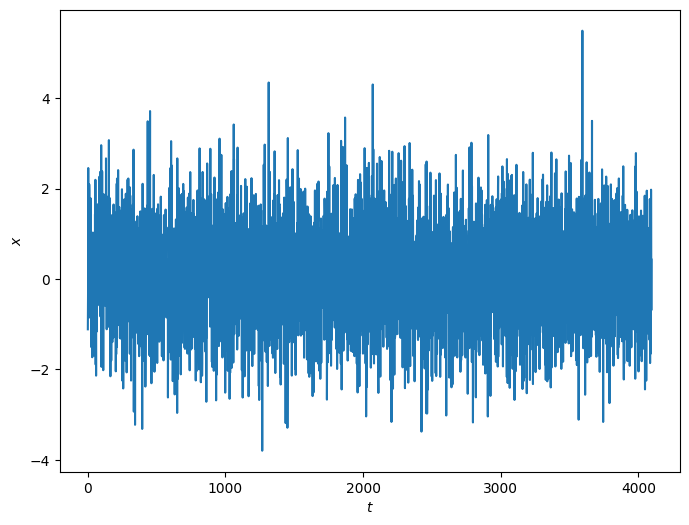

In [4]:

    
N =  4096 # // numero de muestras 
μ  = 0.1
V2 = 1.21 

real_G = np.random.normal(μ, np.sqrt(V2), N) ## FDP GAUSSIANA REAL 

plt.figure(figsize=(8,6))
plt.plot(np.arange(N), real_G)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

# Estimacion de parametros

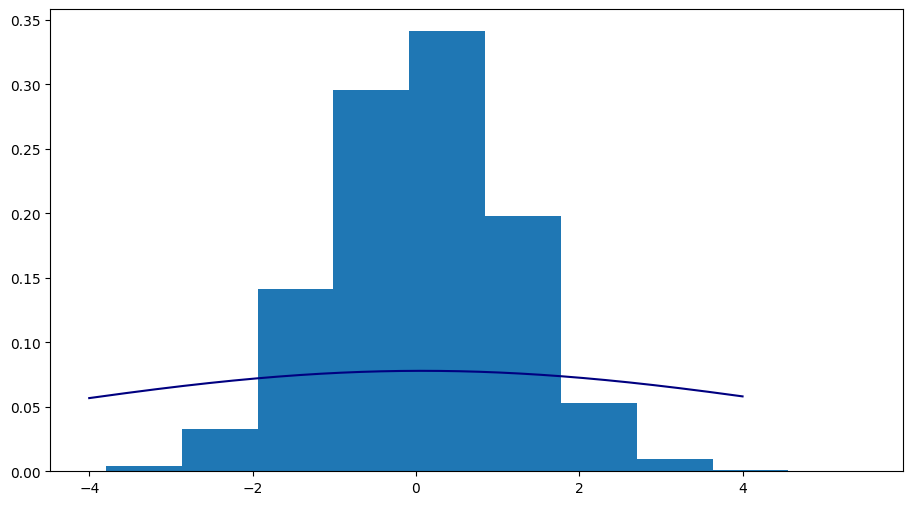

In [5]:
#### estimacion por kernel
if __name__=="__main__":
    #  measures
    #Señal_original = np.random.normal(0.1,1.1**2,4096)
    Señal_original = real_G
    KERNEL=KDE(Señal_original,H=5)
    KERNEL.Gaussian()
    KERNEL.plot(np.linspace(-4,4,1000))

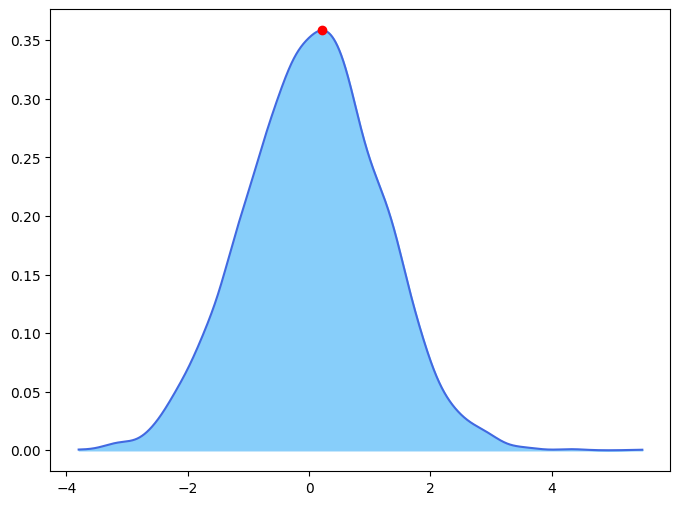

In [6]:
import scipy.stats as stats
pdf_kde = stats.gaussian_kde(real_G)
x_values = np.linspace(min(real_G),max(real_G),num=4096)
y_values = pdf_kde.evaluate(x_values)

max_idx = np.argmax(y_values)
xmax = x_values[max_idx]
ymax = y_values[max_idx]


plt.figure(figsize=(8,6))
plt.plot(x_values,y_values, color='royalblue')
plt.fill_between(x_values,y_values, color='lightskyblue')
plt.plot(xmax, ymax, 'ro')
plt.show()

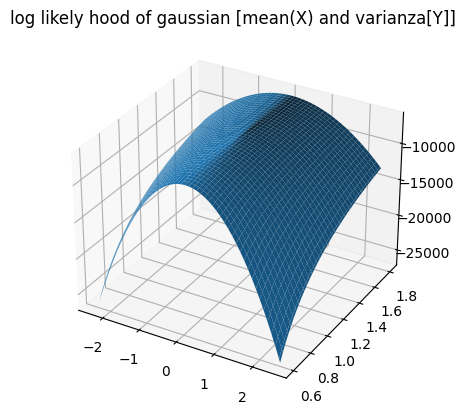

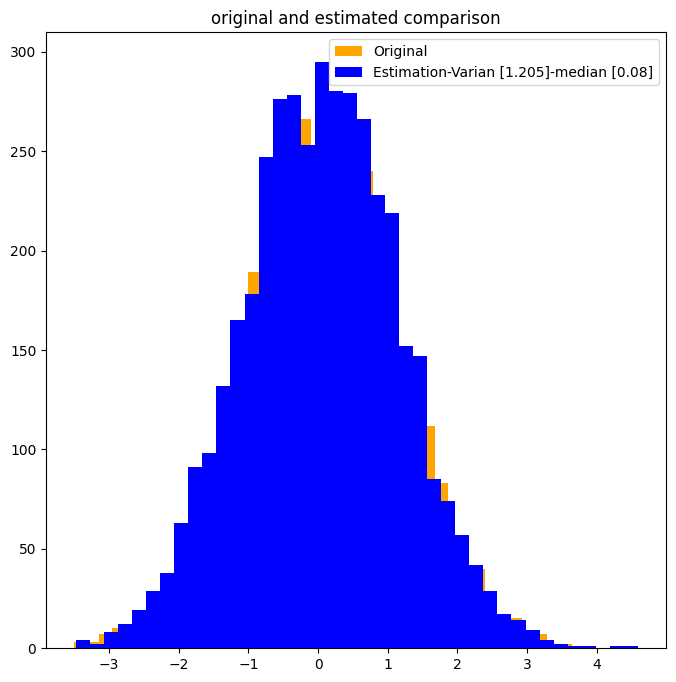

In [7]:
if __name__=="__main__":
    N =  4096 # // numero de muestras 
    #   parameter vector \theta=\mu, \sigma^2
    μ  = 0.1
    V2 = 1.21 
    x = np.random.normal(μ, np.sqrt(V2), N) ## FDP GAUSSIANA REAL   
    MaxVE1=MaxVE(x) ## DATOS 
    Values_mean = np.array([μ-2*V2, μ+2*V2]) ##VECTOR DE MEDIAS 
    Values_var = np.array([V2/2, 1.5*V2]) # VECTOR DE VARIANZAS
    espace=0.01
    media_estimate,varian_estimat,gaussian_estimate=MaxVE1.Gaussian(Values_mean,Values_var,espace)
    


# calculo funcion de transferencia, respuesta impulso

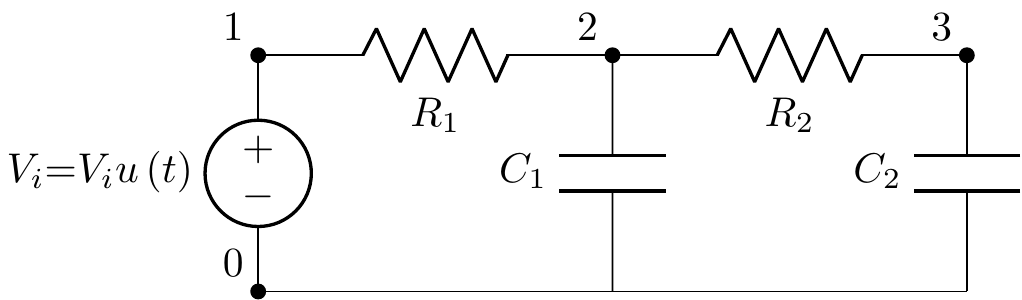

In [8]:
cct = Circuit(
    """
    Vi 1 0 step; down
    R1 1 2; right=1.5
    R2 2 3; right=1.5
    
    C2 3 0_2; down
    C1 2 0_1; down
    W 0 0_1; right
    W 0_1 0_2; right
    """
)


cct.draw()

In [9]:
H=(cct.C2.V(s))/(cct.Vi.V(s))
H.simplify()
H

                             s                             
───────────────────────────────────────────────────────────
            ⎛      2                                      ⎞
            ⎜ 3   s ⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂)        s     ⎟
C₁⋅C₂⋅R₁⋅R₂⋅⎜s  + ────────────────────────── + ───────────⎟
            ⎝            C₁⋅C₂⋅R₁⋅R₂           C₁⋅C₂⋅R₁⋅R₂⎠

In [10]:
H.simplify()

                      1                       
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

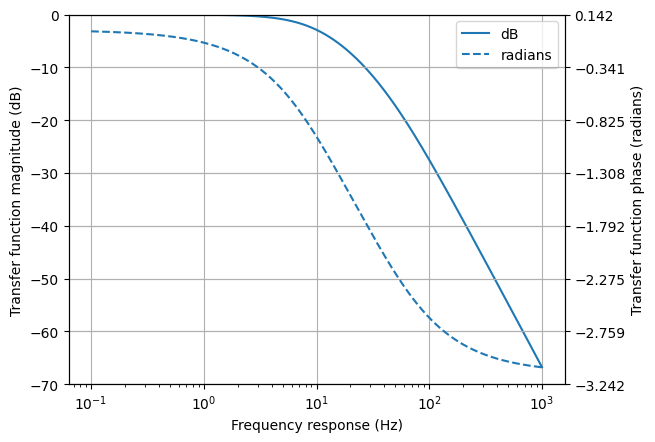

In [11]:
C1 = 2.7e-6
C2 = 1e-6
R1 = 3300
R2 = 6200

H_values = H.subs('C1', C1).subs('C2',C2).subs('R1',R1).subs('R2',R2)

H_values.bode_plot((0,1e3))
plt.show()

In [12]:
H_values.evalf()

             18102.168639803⋅s              
────────────────────────────────────────────
 3                     2                    
s  + 333.260924658774⋅s  + 18102.168639803⋅s

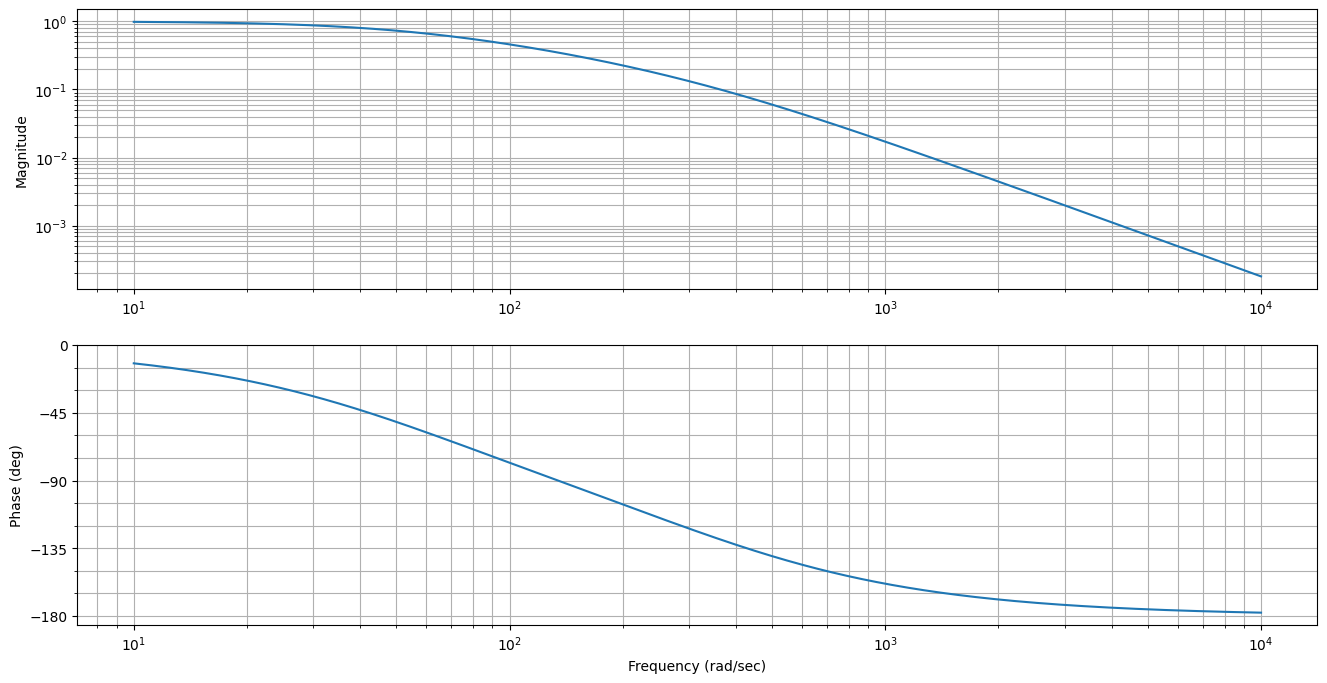

In [13]:
import control as ct
s = ct.tf('s')
H = 1/(C1*C2*R1*R2*s**2+(C1*R1+C2*R2+C2*R2)*s+1)

ct.tf(H)
plt.figure(figsize=(16,8))
ct.bode_plot(H)
plt.show()

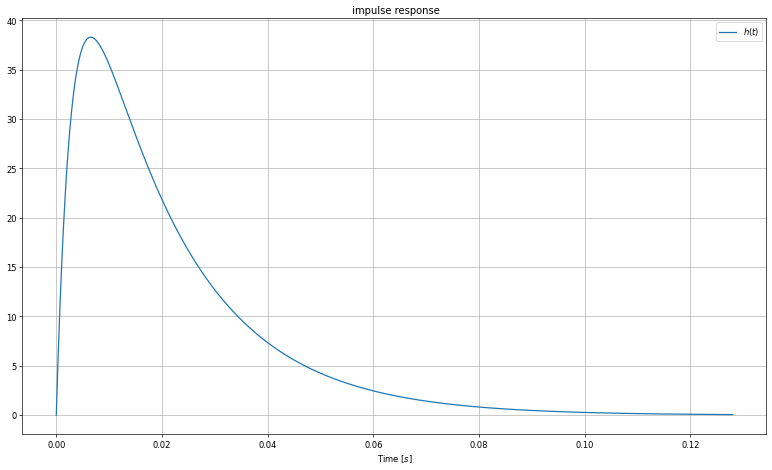

In [14]:
coef_num =[1]
coef_den=[C1*C2*R1*R2, C1*R1+C2*R2+C2*R2, 1]

lti_system=lti(coef_num,coef_den)
Nsample = 4096
t,h= lti_system.impulse(N = Nsample)

plt.figure(figsize=(16,9), dpi=60)
plt.plot(t,h, label = '$h(t)$')
plt.grid()
plt.legend()
plt.title(' impulse response')
plt.xlabel('Time [$s$]')
plt.show()

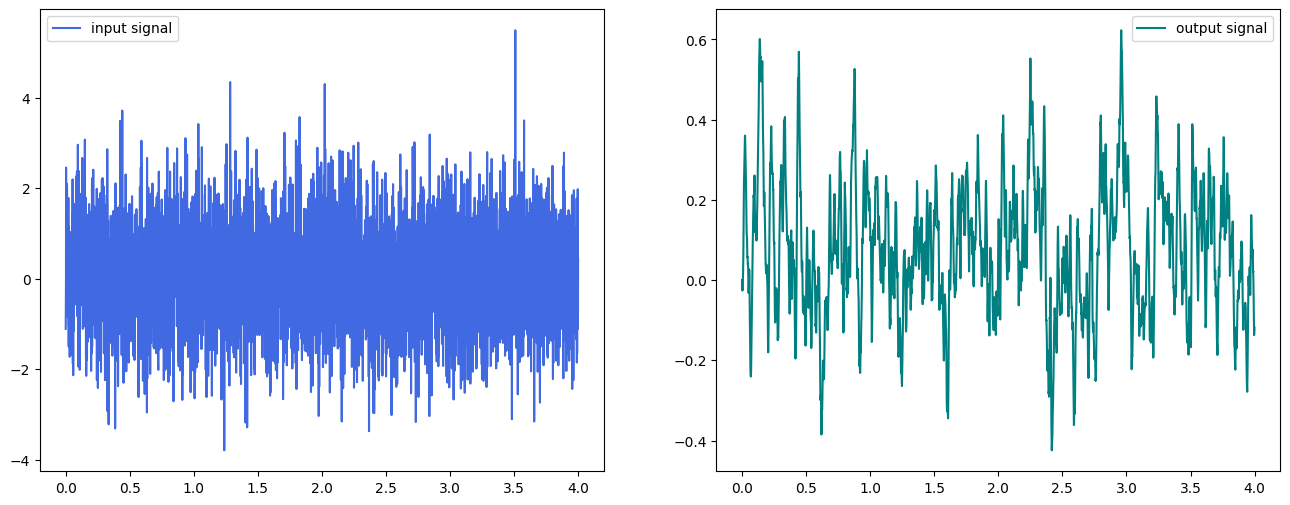

In [15]:
Nsample = 4096
Fdisc = Nsample/4
Tdisc= 1/Fdisc
time = np.arange(0,4,Tdisc)
l = np.pi
expt = real_G

_,Output_circuit,_ = lti_system.output(expt,time) 

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(time, expt,color='royalblue',label='input signal')
ax[0].legend()
ax[1].plot(time, Output_circuit,color = 'teal',label='output signal')
ax[1].legend()
plt.show()

In [16]:
# ENTRADA Y SALIDA PARA DIFERENTES FRECUENCIAS

def input_output_plot(f):
    T = 1/f
    time = np.linspace(0,10*T,1000)
    
    N =  len(time) # // numero de muestras 
    μ  = 0.1
    V2 = 1.21 
    
    sen = np.sin(2*np.pi*f *time)+ np.random.normal(μ, np.sqrt(V2), N)
    _,out_sen,_ = lti_system.output(sen,time)
    #sen = 20*np.log10(np.abs(sen))
    #out_sen= 20*np.log10(np.abs(out_sen))
    plt.figure(figsize=(15,7))
    plt.plot(time, sen,color='skyblue',label='input signal, freq = {} Hz'.format(f))
    plt.plot(time,out_sen,color='crimson',label='output signal')
    plt.ylabel('V')
    plt.xlabel('time')
    plt.legend(loc='upper right')
    plt.title('input vs output')

    
w=interactive(input_output_plot,f=IntSlider(min=1,max=20,step=1),continuous_update=False)
plt.show()
display(w)

interactive(children=(IntSlider(value=1, description='f', max=20, min=1), Output()), _dom_classes=('widget-int…

# Comparación valores de entrada y salida

In [17]:
m1 =real_G.mean()
sd1 = real_G.std()
G=H(0)
print(np.real(m1*G), "  ",np.real(sd1*G))

0.0757142345631861    1.104997628754365


In [18]:
m2= Output_circuit.mean()
sd2= Output_circuit.std()

print(m2, "  ",sd2)

0.07635675024352806    0.16525785398525897


# Estimación de parámetros de la salida

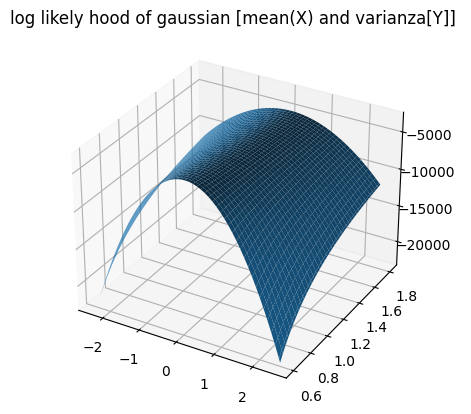

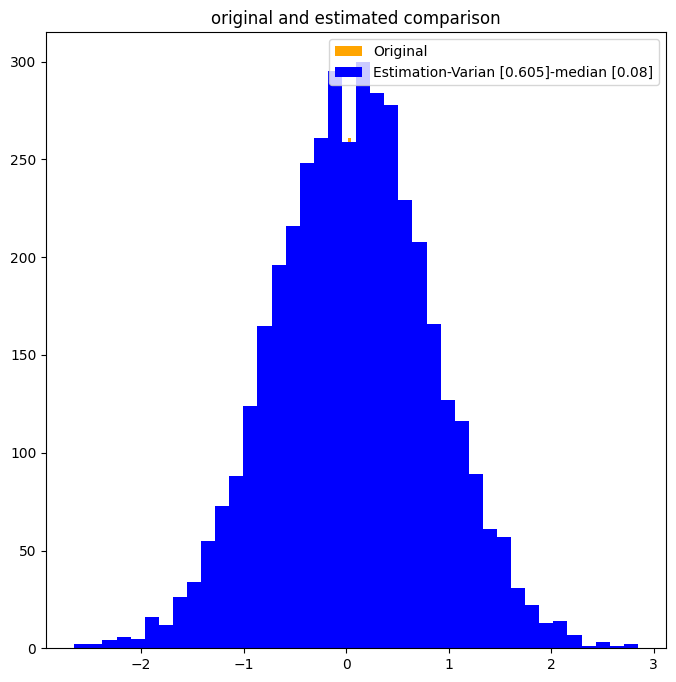

In [19]:
out_estimation = MaxVE(Output_circuit)
Values_mean = np.array([μ-2*V2, μ+2*V2]) ##VECTOR DE MEDIAS 
Values_var = np.array([V2/2, 1.5*V2]) # VECTOR DE VARIANZAS
espace=0.01
media_estimate,varian_estimat,gaussian_estimate=out_estimation.Gaussian(Values_mean,Values_var,espace)

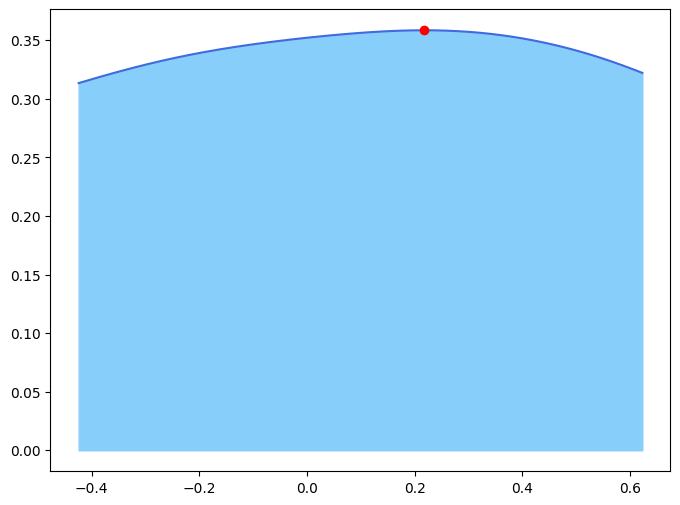

In [20]:
#output Kde estimation 

kde_out = stats.gaussian_kde(Output_circuit)
x_values = np.linspace(min(Output_circuit),max(Output_circuit),num=4096)
y_values = pdf_kde.evaluate(x_values)

max_idx = np.argmax(y_values)
xmax = x_values[max_idx]
ymax = y_values[max_idx]


plt.figure(figsize=(8,6))
plt.plot(x_values,y_values, color='royalblue')
plt.fill_between(x_values,y_values, color='lightskyblue')
plt.plot(xmax, ymax, 'ro')
plt.show()

In [21]:
fo = np.array([2.5,27,61,117,214,380])
tiempo = np.linspace(0,2,4096)
peak = np.zeros(fo.size)
print(fo, tiempo, peak)

[  2.5  27.   61.  117.  214.  380. ] [0.00000000e+00 4.88400488e-04 9.76800977e-04 ... 1.99902320e+00
 1.99951160e+00 2.00000000e+00] [0. 0. 0. 0. 0. 0.]


In [22]:
for i in range(fo.size):
    sig = np.cos(2*np.pi*fo[i]*tiempo)
    _,Output_cos,_ = lti_system.output(sig,tiempo) 

    peak[i]=np.max(Output_cos)

peak


array([0.96003414, 0.27284151, 0.09204978, 0.0351072 , 0.01311916,
       0.00412528])

In [23]:
peakdB = 20*np.log10(peak)
peakdB

array([ -0.35426648, -11.28179102, -20.71954444, -29.09207677,
       -37.64187671, -47.6909328 ])

In [24]:
peakdB_2 = 20*np.log10(H_values.evaluate(2*np.pi*fo))
peakdB_2

array([ -2.29764848, -15.13733736, -24.17478325, -32.94524845,
       -41.98180428, -51.12298687])

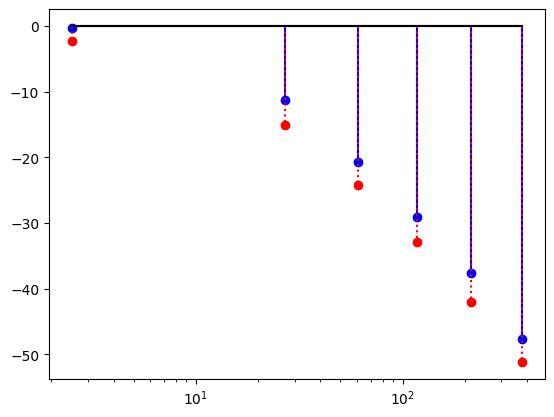

In [25]:
#dist = peakdB[0]-peakdB
plt.stem(fo, peakdB,  linefmt='b-', markerfmt='bo', basefmt='k-')
plt.stem(fo, peakdB_2, linefmt='r:', markerfmt='ro', basefmt='k-')
plt.xscale("log")
plt.show()

# Espectro de potencia

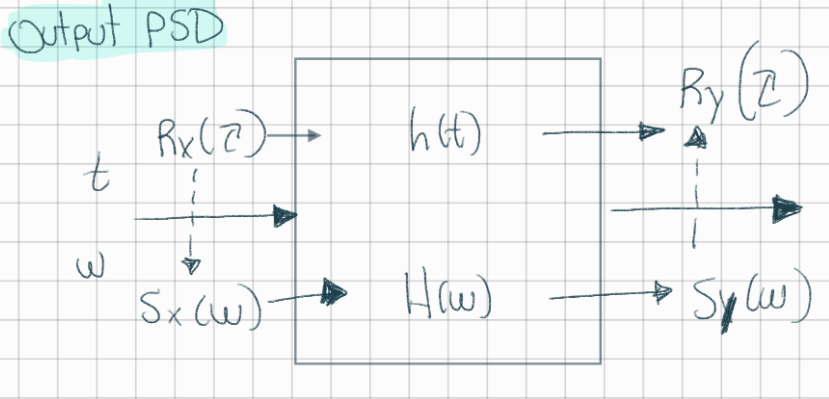


La transformada de Fourier de la funcion de autocorrelacion es igual a la funcion de densidad espectral de potencia.
$$ S_x (\omega)= f\{ R_x(t) \}$$




Pero tambien representa la potencia de la señal en frecuencia.
$$ S_x(\omega) = ║X(\omega)║^2$$

por lo tanto,
$$ R_y (t)=f^{-1}\{║Y(\omega)║^2 \}$$

Dado que:
$$ Y(\omega)= X(\omega)*H(\omega)$$

$$ R_y (t)=f^{-1}\{║X(\omega)║^2  ║H(\omega)║^2\}$$

lo cual corresponde a la densidad espectral de potencia de la entrada, aplicando transformada de Fourier a ambos lados se obtiene:
$$ S_y(\omega)=S_x(\omega)║H(\omega)║^2 $$


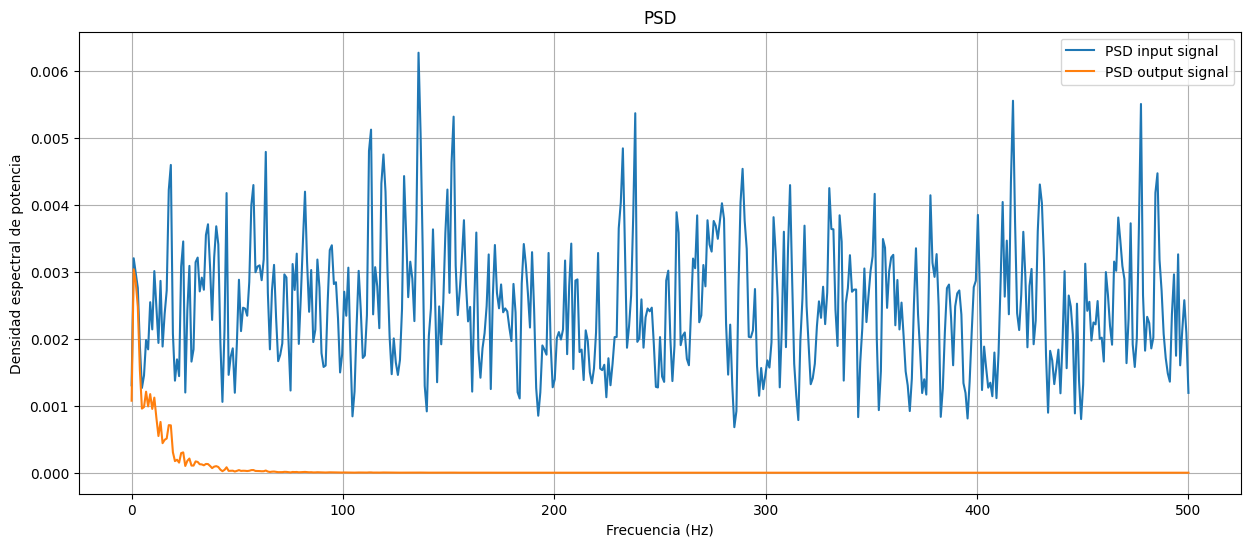

In [26]:
# DENSIDAD ESPECTRAL DE POTENCIA PARA LA SEÑAL DE ENTRADA Y SALIDA DEL CIRCUITO


fs = 1000  # Frecuencia de muestreo (Hz)
# Calcular la PSD
f, Pxx = signal.welch(real_G, fs, nperseg=1024)
f2, Pxx2 = signal.welch(Output_circuit, fs, nperseg=1024)
# Graficar la PSD
plt.figure(figsize=(15,6))
plt.plot(f, Pxx,label='PSD input signal')
plt.plot(f2, Pxx2,label='PSD output signal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('PSD')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
def PSD(f,y_db=False):
    T = 1/f
    time = np.linspace(0,5*T,1000)
    
    N =  len(time) # // numero de muestras 
    μ  = 0.1
    V2 = 1.21 
    
    sen = np.sin(2*np.pi*f *time)+ np.random.normal(μ, np.sqrt(V2), N)
    _,out_sen,_ = lti_system.output(sen,time) 
    
    fs = 1000  # Frecuencia de muestreo (Hz)
    # Calcular la PSD
    f1, Pxx = signal.welch(sen, fs, nperseg=1000)
    f2, Pxx2 = signal.welch(out_sen, fs, nperseg=1000)
    if(y_db==True):
        Pxx=20*np.log10(Pxx)
        Pxx2 =20*np.log10(Pxx2)
    
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].plot(f1,Pxx, label='PSD input')
    ax[0].legend()
    ax[1].plot(f2,Pxx2, label='PSD output')
    ax[1].legend()
    
    plt.title('PSD')

    
    
w=interactive(PSD,f=IntSlider(min=1,max=20,step=1),continuous_update=False)
plt.show()
display(w)
    
       

interactive(children=(IntSlider(value=1, description='f', max=20, min=1), Checkbox(value=False, description='y…